In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
# specifies the path to the data file
DATA_DIR = "../data"

# where to save  
RAW_VIDEO_PATH = "../data/raw/how2sign/videos"
VALID_VIDEO_PATH = "../data/raw/how2sign/valid_videos"
PREPROCESS_VIDEO_PATH = "../data/preprocessed/how2sign/videos"

In [5]:
# read in metadata
metadata = pd.read_csv(f'{DATA_DIR}/raw/how2sign/how2sign_realigned_train.csv')
valid_metadata = pd.read_csv(f'{DATA_DIR}/raw/how2sign/valid_metadata.csv')
metadata

,VIDEO_ID,VIDEO_NAME,SENTENCE_ID,SENTENCE_NAME,START_REALIGNED,END_REALIGNED,SENTENCE
0,--7E2sU6zP4,--7E2sU6zP4-5-rgb_front,--7E2sU6zP4_10,--7E2sU6zP4_10-5-rgb_front,129.06,142.48,And I call them decorative elements because ba...
1,--7E2sU6zP4,--7E2sU6zP4-5-rgb_front,--7E2sU6zP4_11,--7E2sU6zP4_11-5-rgb_front,142.49,169.40,So they don't really have much of a symbolic m...
2,--7E2sU6zP4,--7E2sU6zP4-5-rgb_front,--7E2sU6zP4_12,--7E2sU6zP4_12-5-rgb_front,169.45,182.57,"Now this is very, this is actually an insert o..."
3,--7E2sU6zP4,--7E2sU6zP4-5-rgb_front,--7E2sU6zP4_13,--7E2sU6zP4_13-5-rgb_front,183.12,189.01,"This is all the you know, take off on the idea..."
4,--7E2sU6zP4,--7E2sU6zP4-5-rgb_front,--7E2sU6zP4_5,--7E2sU6zP4_5-5-rgb_front,55.95,65.19,It's almost has a feathery like posture to it.
...,...,...,...,...,...,...,...
31160,fz6XzPxdo-0,fz6XzPxdo-0-5-rgb_front,fz6XzPxdo-0_0,fz6XzPxdo-0_0-5-rgb_front,0.72,6.08,"So, now Grace and I have shown you a multitude..."
31161,fz6XzPxdo-0,fz6XzPxdo-0-5-rgb_front,fz6XzPxdo-0_1,fz6XzPxdo-0_1-5-rgb_front,6.08,11.66,"Now, we're going to show you some stretches th..."
31162,fz6XzPxdo-0,fz6XzPxdo-0-5-rgb_front,fz6XzPxdo-0_17,fz6XzPxdo-0_17-5-rgb_front,134.59,140.73,"And, you'll definitely get the benefits of fle..."
31163,fz6XzPxdo-0,fz6XzPxdo-0-5-rgb_front,fz6XzPxdo-0_2,fz6XzPxdo-0_2-5-rgb_front,11.66,17.62,It's always very important to stretch after an...


In [4]:
valid_metadata

,SENTENCE_NAME,START_REALIGNED,END_REALIGNED,SENTENCE
0,--7E2sU6zP4_10-5-rgb_front,129.06,142.48,And I call them decorative elements because ba...
1,--7E2sU6zP4_11-5-rgb_front,142.49,169.40,So they don't really have much of a symbolic m...
2,--7E2sU6zP4_12-5-rgb_front,169.45,182.57,"Now this is very, this is actually an insert o..."
3,--7E2sU6zP4_13-5-rgb_front,183.12,189.01,"This is all the you know, take off on the idea..."
4,--7E2sU6zP4_5-5-rgb_front,55.95,65.19,It's almost has a feathery like posture to it.
...,...,...,...,...
31042,fz6XzPxdo-0_0-5-rgb_front,0.72,6.08,"So, now Grace and I have shown you a multitude..."
31043,fz6XzPxdo-0_1-5-rgb_front,6.08,11.66,"Now, we're going to show you some stretches th..."
31044,fz6XzPxdo-0_17-5-rgb_front,134.59,140.73,"And, you'll definitely get the benefits of fle..."
31045,fz6XzPxdo-0_2-5-rgb_front,11.66,17.62,It's always very important to stretch after an...


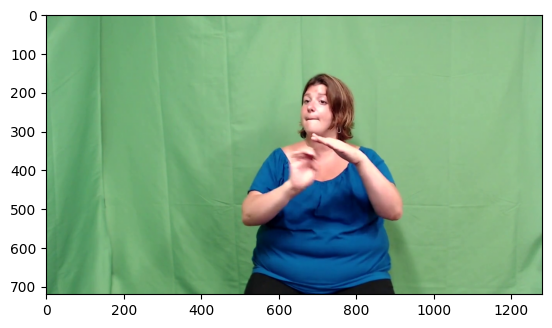

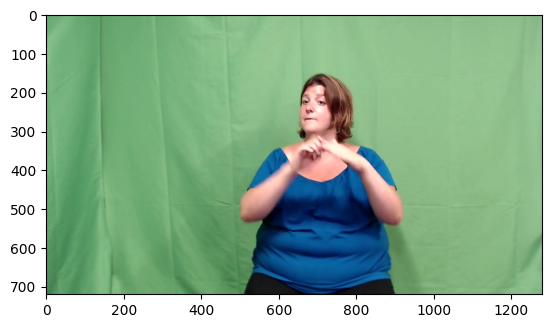

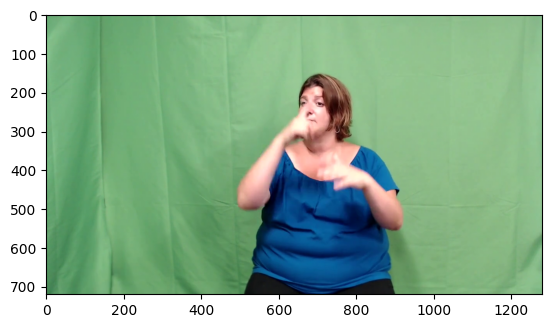

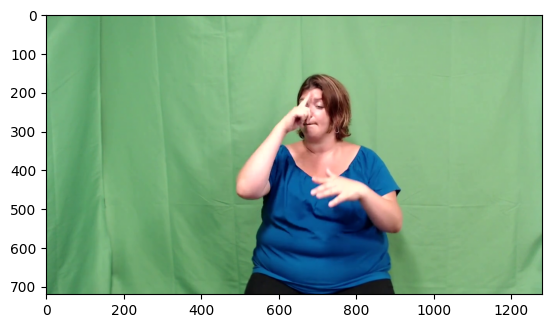

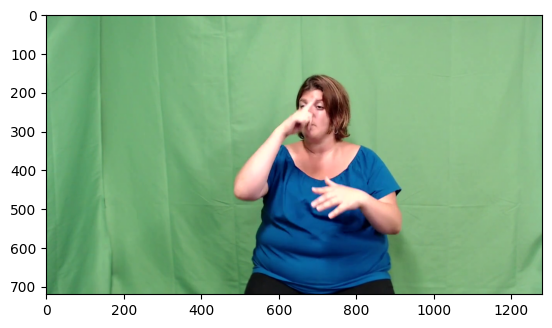

In [4]:
# read in and play the video at specified frame
import cv2
import os
import random
import matplotlib.pyplot as plt

def play_video(video_path, frame):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    ret, frame = cap.read()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
    cap.release()

# play a random video
video_path = f'{RAW_VIDEO_PATH}/--7E2sU6zP4_10-5-rgb_front.mp4'

# play the video for 5 frames from start/end frame
frame_ranges = [129, 132, 135, 138, 141]


## TODO:
# 1. image resize/cropping
# 2. data augmentation (potentially using size view)
# 3. feature engineering using SIFT features for augmented data?
# 3. region proposal network to capture signed frame
for frame in frame_ranges:
    play_video(video_path, frame)


# Remove Invalid Data

In [5]:
# # if the video exits append it to a datafranme
# # create a dataframe to store the video metadata
# valid_metadata = pd.DataFrame(columns=["SENTENCE_NAME", "START_REALIGNED", "END_REALIGNED", "SENTENCE"])
# for i, row in tqdm(metadata.iterrows()):
#     video_path = f'{RAW_VIDEO_PATH}/{row["SENTENCE_NAME"]}.mp4'
#     if os.path.exists(video_path):
#         # print(pd.DataFrame(row[['SENTENCE_NAME', 'START_REALIGNED', 'END_REALIGNED', 'SENTENCE']]).T)
#         valid_metadata = pd.concat([valid_metadata, pd.DataFrame(row[['SENTENCE_NAME', 'START_REALIGNED', 'END_REALIGNED', 'SENTENCE']]).T], ignore_index=True, axis=0)
# valid_metadata.to_csv(f'{DATA_DIR}/raw/how2sign/valid_metadata.csv', index=False)

# Load Video Onto Pytorch

In [6]:
# from utils.VideoLoader import VideoLoader
# from tqdm.notebook import tqdm

# metadata = metadata[['SENTENCE_NAME', 'START_REALIGNED', 'START_REALIGNED', 'SENTENCE']].values
# video_dataset = VideoLoader(root_path = RAW_VIDEO_PATH,
#                             metadata = metadata)

# for i, sample in enumerate(video_dataset):
#     print(i, sample['video'].shape, sample['label'])
#     if i == 2: break

In [11]:
valid_metadata = valid_metadata[['SENTENCE_NAME', 'START_REALIGNED', 'END_REALIGNED', 'SENTENCE']].values
valid_metadata

array([['--7E2sU6zP4_10-5-rgb_front', 129.06, 142.48,
        "And I call them decorative elements because basically all they're meant to do is to enrich and color the page."],
       ['--7E2sU6zP4_11-5-rgb_front', 142.49, 169.4,
        "So they don't really have much of a symbolic meaning other than maybe life is richer, life is beautiful, but they've become so beautifully stylized and so you find them in different illuminative being rendered in very different ways."],
       ['--7E2sU6zP4_12-5-rgb_front', 169.45, 182.57,
        'Now this is very, this is actually an insert of a kind of an envelope for stationary, and this is a very Italian design.'],
       ...,
       ['fz6XzPxdo-0_17-5-rgb_front', 134.59, 140.73,
        "And, you'll definitely get the benefits of flexibility by doing this stretch."],
       ['fz6XzPxdo-0_2-5-rgb_front', 11.66, 17.62,
        "It's always very important to stretch after any exercise routine that you do."],
       ['fz6XzPxdo-0_3-5-rgb_front', 17.

In [9]:
# using VideoFrameDataset
from utils.VideoFrameDataset import VideoFrameDataset

# Load videos using VideoFrameDataset

# Load videos using VideoFrameDataset
video_dataset = VideoFrameDataset(
    root_path=RAW_VIDEO_PATH,
    metadata=valid_metadata,
    num_segments=5,
    frames_per_segment=1,
    transform=None,
    test_mode=False
)

# save as pickle using joblib
import joblib
joblib.dump(video_dataset, f'{DATA_DIR}/preprocessed/video_dataset.pkl')

# for i, sample in enumerate(video_dataset):
#     print(i, sample[0].shape, sample[1])
#     if i == 5: break

0 torch.Size([5, 3, 720, 1280]) And I call them decorative elements because basically all they're meant to do is to enrich and color the page.
1 torch.Size([5, 3, 720, 1280]) So they don't really have much of a symbolic meaning other than maybe life is richer, life is beautiful, but they've become so beautifully stylized and so you find them in different illuminative being rendered in very different ways.
2 torch.Size([5, 3, 720, 1280]) Now this is very, this is actually an insert of a kind of an envelope for stationary, and this is a very Italian design.


In [13]:
# load the pickle dataset and try reading it
video_dataset = joblib.load(f'{DATA_DIR}/preprocessed/video_dataset.pkl')
for i, sample in enumerate(video_dataset):
    print(i, sample[0].shape, sample[1])

0 torch.Size([5, 3, 720, 1280]) And I call them decorative elements because basically all they're meant to do is to enrich and color the page.
1 torch.Size([5, 3, 720, 1280]) So they don't really have much of a symbolic meaning other than maybe life is richer, life is beautiful, but they've become so beautifully stylized and so you find them in different illuminative being rendered in very different ways.
2 torch.Size([5, 3, 720, 1280]) Now this is very, this is actually an insert of a kind of an envelope for stationary, and this is a very Italian design.


In [15]:
video_dataset[5]

(tensor([[[[0.3843, 0.3843, 0.3765,  ..., 0.5333, 0.5373, 0.5373],
           [0.3843, 0.3843, 0.3765,  ..., 0.5333, 0.5373, 0.5373],
           [0.4039, 0.4039, 0.4039,  ..., 0.5333, 0.5373, 0.5373],
           ...,
           [0.2745, 0.2745, 0.2745,  ..., 0.5059, 0.5098, 0.5098],
           [0.2745, 0.2745, 0.2745,  ..., 0.5059, 0.5098, 0.5098],
           [0.2745, 0.2745, 0.2745,  ..., 0.5059, 0.5098, 0.5098]],
 
          [[0.6510, 0.6510, 0.6431,  ..., 0.7333, 0.7373, 0.7373],
           [0.6510, 0.6510, 0.6431,  ..., 0.7333, 0.7373, 0.7373],
           [0.6431, 0.6431, 0.6431,  ..., 0.7333, 0.7373, 0.7373],
           ...,
           [0.5176, 0.5176, 0.5176,  ..., 0.7137, 0.7098, 0.7098],
           [0.5216, 0.5216, 0.5216,  ..., 0.7137, 0.7098, 0.7098],
           [0.5216, 0.5216, 0.5216,  ..., 0.7137, 0.7098, 0.7098]],
 
          [[0.4824, 0.4824, 0.4745,  ..., 0.5412, 0.5451, 0.5451],
           [0.4824, 0.4824, 0.4745,  ..., 0.5412, 0.5451, 0.5451],
           [0.4824, 0.48